In [2]:
import pandas as pd
import requests as rs
from bs4 import BeautifulSoup as soup

In [13]:
text = rs.get('https://nuforc.org/subndx/?id=all').text
html = soup(text, 'html.parser')

headers = [ h.text for h in html.findAll('th')]
data = [[ c.text for c in r.findAll('td')] for r in html.find('tbody').findAll('tr')]

In [46]:
df = pd.DataFrame(data,columns=headers).drop(columns=['Link','Media'])
df.head()

,Occurred,City,State,Country,Shape,Summary,Reported,Posted
0,02/02/1995 23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995,11/02/1999
1,02/02/1995 19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995,11/02/1999
2,02/02/1995 20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995,11/02/1999
3,12/13/1994 18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995,11/02/1999
4,02/03/1995 23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995,11/02/1999


In [48]:
df.shape

(100, 8)

In [51]:
df.Shape.value_counts()

            93
Cone         1
Unknown      1
Disk         1
Triangle     1
Other        1
Fireball     1
Chevron      1
Name: Shape, dtype: int64

In [60]:
df[['date','time']]=df.Occurred.str.split(' ',expand=True)

In [66]:
df1 = df[['date', 'time', 'City', 'State', 'Country', 'Shape', 'Summary', 'Reported',
       'Posted', ]]

df1.head()

,date,time,City,State,Country,Shape,Summary,Reported,Posted
0,02/02/1995,23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995,11/02/1999
1,02/02/1995,19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995,11/02/1999
2,02/02/1995,20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995,11/02/1999
3,12/13/1994,18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995,11/02/1999
4,02/03/1995,23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995,11/02/1999


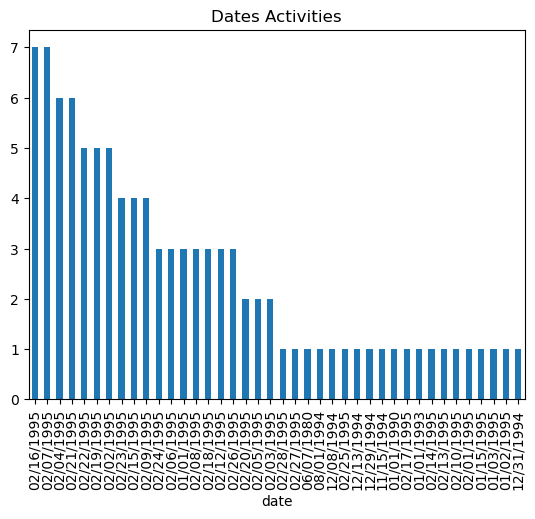

In [73]:
df1.groupby('date').size().sort_values(ascending=False).plot.bar(title='Dates Activities');

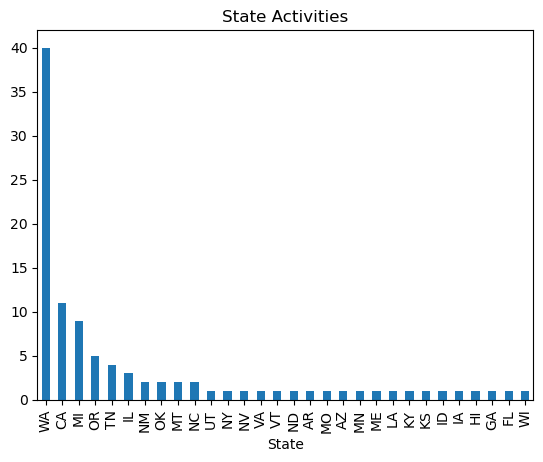

In [75]:
df1.groupby('State').size().sort_values(ascending=False).plot.bar(title='State Activities');